In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
np.random.seed(5)

iris = datasets.load_iris()
X    = iris.data
y    = iris.target


- The plots display firstly what a K-means algorithm would yield using 3 clusters. 
- It is then shown what the effect of a bad initialization is on the classification process: 
- By setting n_init to only 1 (default is 10), the amount of times that the algorithm will be run with different centroid seeds is reduced. 
- The next plot displays what using 8 clusters would deliver and finally the ground truth.

In [4]:
estimators = [('k_means_iris_8',        KMeans(n_clusters=8)),
              ('k_means_iris_3',        KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
             ]

titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

In [5]:
for i, j in estimators:
    print(i, ':', j)


k_means_iris_8 : KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
k_means_iris_3 : KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
k_means_iris_bad_init : KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


## How does the k-means++ works? 

research yourself!!!

Essentially there are 3 methods to assign initial centers 

1. K-Means++
2. Random choice of points from the samples
3. user provided points(vectors)

>K-Means++
- Say we need to select 2 cluster centers, 
- instead of selecting them all randomly {like we do in simple k means}, we will select the first one randomly, then find the points that are farthest to the first center 
- These points most probably do not belong to the first cluster center as they are far from it and assign the second cluster center nearby those far points.

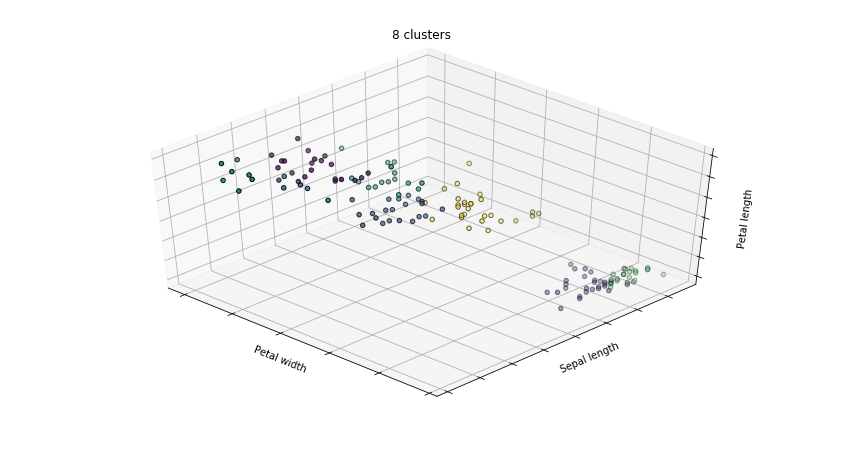

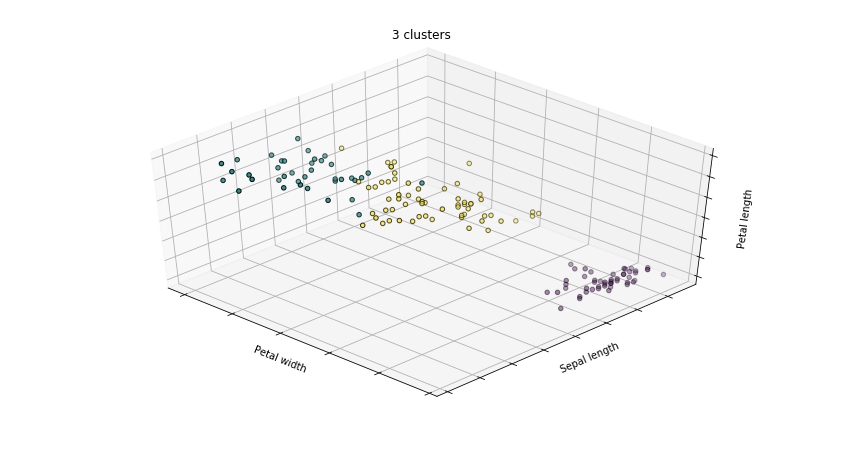

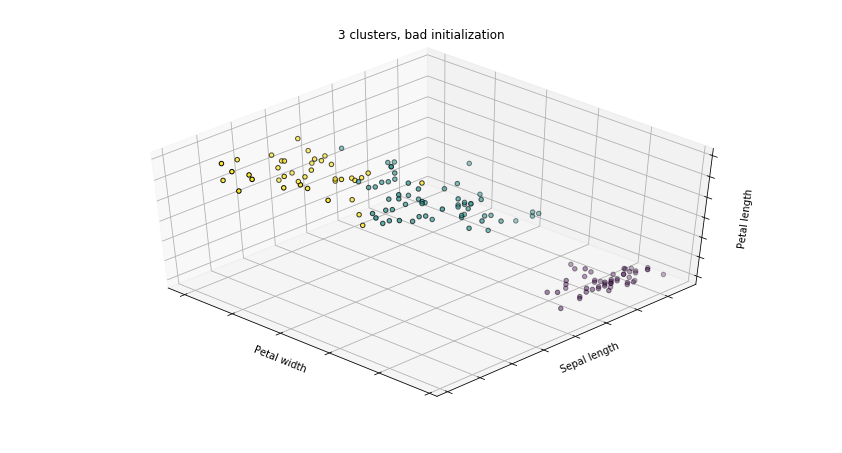

In [59]:
fignum = 1
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 6))
    
    ax  = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], 
               X[:, 0], 
               X[:, 2],
               c = labels.astype(np.float), 
               edgecolor ='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    
    ax.set_title(titles[fignum - 1])
    
    ax.dist = 12
    fignum = fignum + 1
    

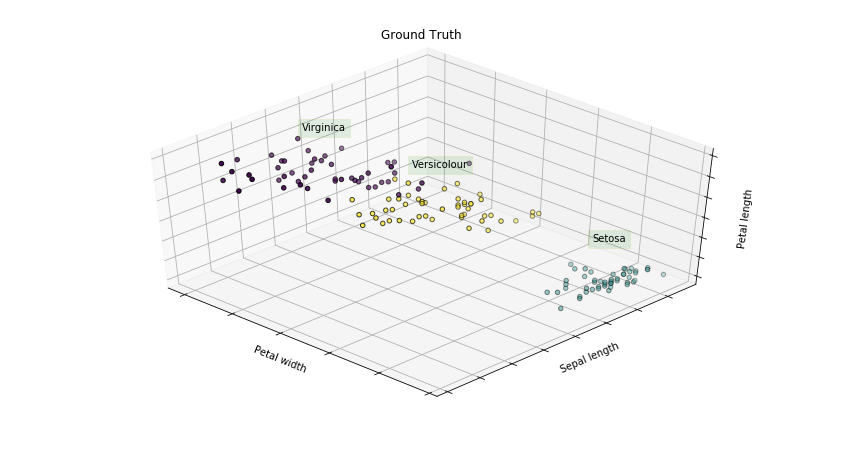

In [60]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(12, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.1, edgecolor='y', facecolor='g'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], 
           X[:, 0], 
           X[:, 2], 
           c=y, 
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

#### Example - text 3D

Text(0.5,0,'Z axis')

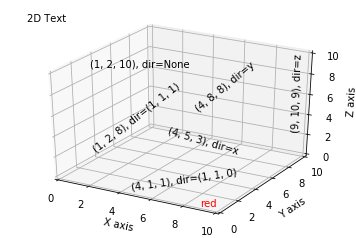

In [16]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax  = fig.gca(projection='3d')

# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

# Demo 2: color
ax.text(9, 0, 0, "red", color='red')

# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')